In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import math
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance
import matplotlib.pyplot as plt

## Train data preprocessing

In [2]:
df_train = pd.read_csv('./data_preprocess/data/train.csv')
df_train_label = pd.read_csv('./data_preprocess/data/training-label.csv')
df_test = pd.read_csv('./data_preprocess/data/test.csv')
submit_index = pd.read_csv('./data_preprocess/data/submit_samples.csv')
df_train

,mac_hash,sniffer_loc,created_time
0,0003ae8541d0e925fcee242287e2ad27,11,2018-12-07 16:48:08
1,00078611037990f7f36b722f22595fe7,3,2018-12-07 16:29:35
2,00078611037990f7f36b722f22595fe7,2,2018-12-07 16:30:41
3,00078611037990f7f36b722f22595fe7,4,2018-12-07 16:37:06
4,00078611037990f7f36b722f22595fe7,8,2018-12-07 16:37:07
...,...,...,...
41635,fff2ca0333532d6348d5b4fa39028dd4,3,2018-12-07 18:37:37
41636,fff2ca0333532d6348d5b4fa39028dd4,13,2018-12-07 18:47:53
41637,fff2ca0333532d6348d5b4fa39028dd4,12,2018-12-07 18:47:53
41638,fff2ca0333532d6348d5b4fa39028dd4,11,2018-12-07 18:47:54


In [3]:
hash_list = []
cnt_array = np.zeros((6959,14))
num = 0

for i in range(len(df_train)):
    if(i == (len(df_train)-1)):
        cnt_array[num][int(df_train['sniffer_loc'].iloc[i])-1] = 1
        hash_list.append(df_train['mac_hash'].iloc[i])
        print(num, cnt_array[num])
        num += 1
    elif(df_train['mac_hash'].iloc[i] == df_train['mac_hash'].iloc[i+1]):
        cnt_array[num][int(df_train['sniffer_loc'].iloc[i])-1] = 1
    else:
        cnt_array[num][int(df_train['sniffer_loc'].iloc[i])-1] = 1
        hash_list.append(df_train['mac_hash'].iloc[i])
        print(num, cnt_array[num])
        num += 1

0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
1 [0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.]
2 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
3 [0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
4 [0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
5 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 [0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.]
7 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
8 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
9 [1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
10 [0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
11 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
12 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
13 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
14 [0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
15 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
16 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
17 [0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
18 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
19 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
20 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
21 [0. 1. 0. 0. 0. 0. 0

512 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
513 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
514 [0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
515 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
516 [0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.]
517 [0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
518 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
519 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
520 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
521 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
522 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
523 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.]
524 [0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]
525 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
526 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
527 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
528 [0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
529 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
530 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
531 [0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.]
532 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

984 [0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
985 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
986 [0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
987 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
988 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
989 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
990 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
991 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
992 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
993 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
994 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.]
995 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
996 [0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
997 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
998 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
999 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
1000 [1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
1001 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
1002 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1003 [0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
1004 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 

1455 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
1456 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
1457 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1458 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1459 [0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1460 [0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
1461 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1462 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1463 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1464 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1465 [0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1466 [0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1467 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1468 [0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1469 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.]
1470 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
1471 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1472 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
1473 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
1474 [0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
1475 [0. 1. 1. 1. 1.

1920 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.]
1921 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0.]
1922 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1923 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
1924 [1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.]
1925 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
1926 [0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1927 [0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
1928 [0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]
1929 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
1930 [1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1931 [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
1932 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1933 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1934 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1935 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1936 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1937 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1938 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1939 [0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
1940 [0. 1. 1. 1. 0.

2372 [1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
2373 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2374 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
2375 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2376 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
2377 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2378 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2379 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
2380 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
2381 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
2382 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
2383 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0.]
2384 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
2385 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
2386 [0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
2387 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
2388 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
2389 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
2390 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
2391 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2392 [1. 1. 0. 0. 0.

2845 [0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
2846 [0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
2847 [0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
2848 [0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
2849 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
2850 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.]
2851 [0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
2852 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2853 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
2854 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
2855 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2856 [0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
2857 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2858 [0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
2859 [0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.]
2860 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
2861 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2862 [0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.]
2863 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
2864 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2865 [0. 1. 1. 1. 1.

3308 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3309 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
3310 [0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3311 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
3312 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
3313 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
3314 [0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
3315 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3316 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
3317 [0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
3318 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
3319 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
3320 [0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
3321 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
3322 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
3323 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.]
3324 [0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.]
3325 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
3326 [0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
3327 [0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
3328 [0. 1. 1. 0. 0.

3774 [0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
3775 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
3776 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3777 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
3778 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
3779 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3780 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
3781 [0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
3782 [0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
3783 [0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
3784 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
3785 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
3786 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
3787 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
3788 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
3789 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
3790 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
3791 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3792 [0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
3793 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
3794 [0. 1. 1. 1. 0.

4250 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4251 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
4252 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
4253 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
4254 [0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.]
4255 [0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
4256 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
4257 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4258 [0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.]
4259 [1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
4260 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
4261 [0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.]
4262 [0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.]
4263 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
4264 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4265 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
4266 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4267 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
4268 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
4269 [1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
4270 [0. 0. 0. 0. 0.

4743 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
4744 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4745 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1.]
4746 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4747 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
4748 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
4749 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
4750 [0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
4751 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4752 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4753 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4754 [0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
4755 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
4756 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4757 [0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
4758 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4759 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4760 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
4761 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4762 [0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
4763 [0. 1. 1. 1. 1.

5213 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
5214 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5215 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
5216 [0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
5217 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5218 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5219 [0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
5220 [0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5221 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
5222 [0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5223 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1.]
5224 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.]
5225 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
5226 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5227 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
5228 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
5229 [1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
5230 [0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.]
5231 [0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.]
5232 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5233 [0. 1. 0. 0. 0.

5678 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
5679 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
5680 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
5681 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5682 [0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]
5683 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5684 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5685 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5686 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.]
5687 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5688 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5689 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
5690 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5691 [0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0.]
5692 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
5693 [0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
5694 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
5695 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
5696 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
5697 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5698 [0. 1. 1. 1. 0.

6134 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
6135 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
6136 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.]
6137 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6138 [0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
6139 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
6140 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
6141 [0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
6142 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6143 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6144 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
6145 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
6146 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
6147 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
6148 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
6149 [0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]
6150 [0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
6151 [0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
6152 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6153 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.]
6154 [0. 1. 1. 1. 1.

6601 [0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
6602 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
6603 [0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.]
6604 [0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
6605 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]
6606 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
6607 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.]
6608 [0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.]
6609 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6610 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6611 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
6612 [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
6613 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6614 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6615 [0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
6616 [0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
6617 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
6618 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
6619 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
6620 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
6621 [1. 1. 0. 1. 1.

In [4]:
df_mac_train = pd.DataFrame(hash_list)
df_mac_train.columns = list(['mac_hash'])
df_mac_train

,mac_hash
0,0003ae8541d0e925fcee242287e2ad27
1,00078611037990f7f36b722f22595fe7
2,000ce31739b333d931813de403156844
3,0027240b2aeb1f7f3c053c073cafb452
4,0028a89964416dc9a8a66cc7fe25ef4e
...,...
6954,ffca215be2cb1505d931bd162da60104
6955,ffcaf0f29c6bede7b5cd9bc807c31715
6956,ffd0c4403c3c44dcbe4772821b032252
6957,ffd7be58ee3c3fb47530ae7e4f251f88


In [5]:
df_cnt_train = pd.DataFrame(cnt_array)
df_cnt_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
6955,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6956,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 客群分析

In [6]:
# 1
# 3
# 2, 4, 5, 6
# 7
# 8, 13
# 9, 10, 11
# 12, 14

class1 = np.zeros(len(df_train))

for i in range(len(df_train)):
    if(df_train['sniffer_loc'].iloc[i] == 1):
        class1[i] = 0
    elif(df_train['sniffer_loc'].iloc[i] == 3):
        class1[i] = 1
    elif(df_train['sniffer_loc'].iloc[i] == 2 or df_train['sniffer_loc'].iloc[i] == 4 or df_train['sniffer_loc'].iloc[i] == 5 or df_train['sniffer_loc'].iloc[i] == 6):
        class1[i] = 2
    elif(df_train['sniffer_loc'].iloc[i] == 7):
        class1[i] = 3
    elif(df_train['sniffer_loc'].iloc[i] == 8 or df_train['sniffer_loc'].iloc[i] == 13):
        class1[i] = 4
    elif(df_train['sniffer_loc'].iloc[i] == 9 or df_train['sniffer_loc'].iloc[i] == 10 or df_train['sniffer_loc'].iloc[i] == 11):
        class1[i] = 5
    else:
        class1[i] = 6  
        
class_df = pd.DataFrame({'class': class1})
df_data = pd.concat([df_train, class_df], axis=1)
df_data

,mac_hash,sniffer_loc,created_time,class
0,0003ae8541d0e925fcee242287e2ad27,11,2018-12-07 16:48:08,5.0
1,00078611037990f7f36b722f22595fe7,3,2018-12-07 16:29:35,1.0
2,00078611037990f7f36b722f22595fe7,2,2018-12-07 16:30:41,2.0
3,00078611037990f7f36b722f22595fe7,4,2018-12-07 16:37:06,2.0
4,00078611037990f7f36b722f22595fe7,8,2018-12-07 16:37:07,4.0
...,...,...,...,...
41635,fff2ca0333532d6348d5b4fa39028dd4,3,2018-12-07 18:37:37,1.0
41636,fff2ca0333532d6348d5b4fa39028dd4,13,2018-12-07 18:47:53,4.0
41637,fff2ca0333532d6348d5b4fa39028dd4,12,2018-12-07 18:47:53,6.0
41638,fff2ca0333532d6348d5b4fa39028dd4,11,2018-12-07 18:47:54,5.0


In [7]:
hash_list = []
index_list = []
cnt_array = np.zeros(7)
color_array = np.zeros((6959,7))
num = 0

for i in range(len(df_data)):
    if(i == (len(df_data)-1)):
        cnt_array[int(df_data['class'].iloc[i])] += 1
        hash_list.append(df_data['mac_hash'].iloc[i])
        print(num, cnt_array)
        color_array[num] = cnt_array
        num += 1
        index = np.argmax(cnt_array)
        index_list.append(index)
        cnt_array = np.zeros(7)
    elif(df_data['mac_hash'].iloc[i] == df_data['mac_hash'].iloc[i+1]):
        cnt_array[int(df_data['class'].iloc[i])] += 1
    else:
        cnt_array[int(df_data['class'].iloc[i])] += 1
        hash_list.append(df_data['mac_hash'].iloc[i])
        print(num, cnt_array)
        color_array[num] = cnt_array
        index = np.argmax(cnt_array)
        index_list.append(index)
        num += 1
        cnt_array = np.zeros(7)

0 [0. 0. 0. 0. 0. 1. 0.]
1 [0. 1. 4. 0. 1. 2. 0.]
2 [1. 1. 4. 1. 2. 3. 2.]
3 [0. 0. 4. 1. 2. 3. 2.]
4 [0. 1. 3. 0. 1. 3. 2.]
5 [0. 1. 0. 0. 0. 0. 0.]
6 [0. 1. 4. 1. 1. 3. 1.]
7 [0. 1. 4. 0. 2. 3. 1.]
8 [0. 1. 4. 0. 2. 2. 2.]
9 [1. 1. 4. 0. 1. 1. 0.]
10 [0. 1. 2. 0. 1. 2. 0.]
11 [0. 0. 0. 0. 1. 3. 1.]
12 [1. 0. 0. 0. 0. 0. 0.]
13 [0. 0. 1. 0. 0. 0. 0.]
14 [0. 1. 3. 1. 1. 2. 0.]
15 [0. 0. 0. 0. 0. 0. 1.]
16 [0. 1. 4. 0. 2. 3. 2.]
17 [0. 1. 3. 1. 2. 3. 1.]
18 [1. 0. 0. 0. 0. 0. 0.]
19 [0. 1. 4. 0. 2. 2. 2.]
20 [0. 1. 0. 0. 0. 0. 0.]
21 [0. 0. 1. 0. 0. 0. 0.]
22 [0. 1. 3. 1. 2. 3. 2.]
23 [1. 1. 4. 1. 2. 3. 1.]
24 [0. 1. 3. 0. 2. 2. 1.]
25 [0. 1. 2. 0. 1. 0. 1.]
26 [0. 1. 4. 0. 0. 0. 0.]
27 [0. 1. 4. 0. 2. 3. 2.]
28 [0. 0. 0. 0. 1. 0. 0.]
29 [1. 1. 4. 1. 2. 3. 1.]
30 [0. 1. 2. 0. 1. 2. 1.]
31 [0. 1. 4. 1. 1. 3. 0.]
32 [0. 1. 1. 0. 0. 0. 0.]
33 [0. 1. 0. 0. 0. 0. 0.]
34 [0. 0. 2. 0. 0. 1. 0.]
35 [0. 1. 3. 0. 2. 1. 1.]
36 [0. 1. 4. 0. 1. 3. 0.]
37 [0. 0. 0. 0. 0. 0. 1.]
38 [1. 1. 4. 1. 2. 0. 

575 [0. 1. 0. 0. 0. 0. 0.]
576 [0. 0. 1. 0. 0. 0. 0.]
577 [0. 1. 4. 1. 2. 3. 2.]
578 [0. 1. 0. 0. 0. 0. 0.]
579 [0. 0. 0. 0. 0. 1. 1.]
580 [0. 0. 0. 0. 0. 0. 1.]
581 [0. 0. 0. 1. 0. 0. 0.]
582 [0. 0. 0. 1. 0. 0. 0.]
583 [0. 1. 3. 0. 1. 3. 0.]
584 [0. 1. 4. 1. 1. 2. 0.]
585 [1. 1. 4. 1. 0. 1. 0.]
586 [0. 1. 1. 0. 0. 0. 0.]
587 [0. 0. 0. 0. 0. 1. 0.]
588 [0. 0. 1. 1. 0. 0. 0.]
589 [1. 0. 1. 1. 0. 0. 0.]
590 [0. 0. 2. 1. 2. 3. 2.]
591 [0. 1. 1. 1. 1. 3. 0.]
592 [1. 1. 3. 0. 0. 0. 0.]
593 [0. 0. 0. 0. 0. 0. 1.]
594 [0. 0. 0. 1. 0. 1. 0.]
595 [0. 1. 4. 1. 2. 3. 2.]
596 [0. 0. 2. 1. 1. 2. 1.]
597 [0. 0. 1. 0. 0. 0. 0.]
598 [0. 1. 0. 0. 0. 0. 0.]
599 [1. 1. 3. 0. 0. 2. 1.]
600 [0. 0. 0. 1. 0. 1. 0.]
601 [0. 0. 1. 0. 2. 2. 2.]
602 [0. 1. 1. 0. 0. 2. 0.]
603 [0. 0. 1. 0. 1. 0. 2.]
604 [0. 1. 2. 0. 1. 2. 1.]
605 [0. 0. 1. 0. 0. 0. 0.]
606 [0. 0. 1. 0. 1. 0. 0.]
607 [0. 1. 0. 0. 0. 0. 0.]
608 [1. 1. 4. 1. 1. 3. 2.]
609 [0. 0. 1. 0. 0. 0. 0.]
610 [0. 1. 4. 0. 0. 0. 0.]
611 [0. 0. 0. 1. 1. 3. 2.]
6

1055 [0. 0. 3. 0. 1. 3. 2.]
1056 [0. 1. 4. 1. 2. 3. 1.]
1057 [0. 0. 0. 0. 1. 3. 0.]
1058 [0. 1. 0. 0. 0. 0. 0.]
1059 [0. 1. 3. 0. 0. 3. 2.]
1060 [0. 1. 3. 0. 0. 0. 0.]
1061 [0. 0. 3. 1. 2. 3. 1.]
1062 [0. 0. 0. 0. 0. 0. 1.]
1063 [0. 0. 4. 0. 2. 1. 2.]
1064 [1. 1. 4. 1. 2. 3. 2.]
1065 [0. 1. 4. 0. 0. 0. 0.]
1066 [0. 0. 1. 0. 0. 0. 1.]
1067 [1. 1. 4. 1. 2. 3. 1.]
1068 [0. 1. 4. 1. 2. 3. 2.]
1069 [0. 1. 2. 1. 0. 1. 1.]
1070 [0. 0. 0. 0. 0. 2. 0.]
1071 [0. 0. 1. 0. 0. 0. 0.]
1072 [0. 0. 3. 0. 0. 1. 0.]
1073 [0. 0. 1. 0. 0. 0. 0.]
1074 [0. 1. 0. 0. 0. 0. 0.]
1075 [0. 1. 4. 0. 1. 3. 2.]
1076 [0. 1. 3. 0. 0. 3. 1.]
1077 [0. 1. 0. 0. 1. 1. 0.]
1078 [0. 1. 0. 0. 0. 0. 0.]
1079 [0. 0. 0. 0. 0. 0. 1.]
1080 [0. 0. 4. 0. 2. 3. 2.]
1081 [0. 0. 4. 0. 1. 3. 2.]
1082 [0. 1. 3. 0. 0. 2. 0.]
1083 [0. 0. 4. 0. 2. 3. 2.]
1084 [0. 0. 1. 0. 0. 0. 0.]
1085 [0. 1. 4. 1. 2. 3. 2.]
1086 [0. 1. 3. 0. 0. 0. 1.]
1087 [0. 0. 1. 0. 1. 0. 0.]
1088 [0. 1. 0. 0. 0. 0. 0.]
1089 [0. 0. 1. 0. 0. 0. 0.]
1090 [0. 1. 1. 0. 1.

1531 [1. 1. 4. 1. 2. 3. 1.]
1532 [0. 0. 0. 0. 0. 0. 1.]
1533 [0. 0. 2. 0. 1. 3. 2.]
1534 [0. 1. 4. 0. 2. 3. 2.]
1535 [0. 0. 4. 0. 1. 1. 0.]
1536 [0. 0. 2. 0. 0. 2. 1.]
1537 [0. 0. 0. 0. 1. 0. 0.]
1538 [0. 1. 3. 0. 0. 0. 0.]
1539 [0. 0. 2. 0. 0. 0. 0.]
1540 [0. 0. 1. 0. 0. 2. 1.]
1541 [0. 1. 4. 1. 2. 3. 2.]
1542 [0. 1. 4. 0. 2. 3. 2.]
1543 [0. 0. 0. 0. 1. 0. 0.]
1544 [0. 0. 0. 0. 0. 1. 0.]
1545 [0. 1. 2. 0. 1. 3. 2.]
1546 [0. 1. 4. 0. 2. 3. 2.]
1547 [0. 1. 4. 0. 2. 3. 2.]
1548 [0. 1. 3. 1. 2. 3. 1.]
1549 [0. 0. 0. 1. 0. 0. 0.]
1550 [1. 1. 4. 1. 2. 3. 2.]
1551 [0. 0. 0. 0. 0. 0. 2.]
1552 [0. 1. 0. 0. 0. 0. 0.]
1553 [0. 0. 1. 0. 0. 0. 0.]
1554 [0. 0. 0. 0. 0. 0. 1.]
1555 [0. 0. 0. 0. 0. 1. 0.]
1556 [0. 1. 3. 1. 0. 2. 1.]
1557 [1. 1. 4. 1. 1. 2. 1.]
1558 [1. 1. 4. 1. 0. 0. 0.]
1559 [0. 1. 0. 0. 0. 0. 0.]
1560 [0. 0. 2. 1. 0. 3. 1.]
1561 [0. 0. 0. 0. 0. 0. 1.]
1562 [0. 0. 3. 0. 0. 0. 0.]
1563 [0. 1. 0. 0. 0. 0. 0.]
1564 [0. 1. 0. 0. 1. 0. 1.]
1565 [0. 0. 0. 0. 0. 0. 1.]
1566 [0. 1. 3. 0. 0.

2038 [0. 1. 2. 0. 0. 2. 0.]
2039 [0. 1. 3. 0. 1. 3. 1.]
2040 [0. 1. 4. 1. 1. 3. 1.]
2041 [0. 0. 0. 0. 0. 0. 1.]
2042 [0. 1. 2. 0. 2. 1. 2.]
2043 [0. 0. 4. 0. 2. 2. 2.]
2044 [0. 0. 3. 1. 2. 3. 1.]
2045 [0. 0. 1. 0. 0. 0. 0.]
2046 [0. 1. 2. 1. 1. 3. 1.]
2047 [1. 0. 4. 1. 2. 3. 2.]
2048 [0. 0. 0. 0. 0. 0. 2.]
2049 [1. 1. 3. 0. 1. 0. 1.]
2050 [1. 1. 4. 0. 2. 3. 2.]
2051 [0. 0. 1. 0. 0. 0. 0.]
2052 [1. 1. 4. 1. 2. 3. 1.]
2053 [1. 0. 0. 0. 0. 0. 0.]
2054 [0. 1. 1. 0. 0. 1. 0.]
2055 [0. 0. 0. 0. 0. 0. 2.]
2056 [1. 1. 3. 1. 2. 3. 2.]
2057 [0. 1. 2. 0. 0. 0. 0.]
2058 [1. 0. 1. 0. 0. 1. 0.]
2059 [0. 0. 0. 0. 0. 1. 1.]
2060 [0. 1. 0. 0. 0. 0. 0.]
2061 [0. 1. 4. 0. 0. 0. 0.]
2062 [0. 0. 0. 0. 1. 2. 0.]
2063 [1. 1. 3. 1. 1. 1. 0.]
2064 [0. 1. 3. 1. 2. 3. 2.]
2065 [0. 0. 4. 1. 2. 3. 1.]
2066 [0. 0. 0. 0. 0. 1. 0.]
2067 [0. 1. 0. 0. 0. 0. 0.]
2068 [0. 0. 0. 0. 0. 0. 1.]
2069 [0. 0. 1. 0. 1. 1. 0.]
2070 [0. 1. 4. 0. 0. 3. 1.]
2071 [0. 0. 0. 0. 1. 0. 0.]
2072 [0. 1. 1. 0. 0. 2. 0.]
2073 [1. 0. 0. 0. 0.

2540 [0. 1. 0. 0. 0. 0. 0.]
2541 [1. 1. 4. 1. 2. 3. 1.]
2542 [0. 0. 0. 0. 1. 3. 2.]
2543 [0. 1. 4. 1. 2. 3. 2.]
2544 [0. 1. 4. 1. 2. 3. 2.]
2545 [1. 1. 4. 1. 1. 2. 0.]
2546 [0. 0. 0. 0. 1. 1. 2.]
2547 [0. 0. 4. 1. 2. 3. 2.]
2548 [0. 1. 4. 1. 2. 3. 1.]
2549 [0. 0. 1. 0. 1. 1. 0.]
2550 [0. 0. 1. 0. 0. 0. 1.]
2551 [0. 1. 2. 1. 1. 1. 1.]
2552 [0. 1. 3. 0. 1. 3. 2.]
2553 [0. 0. 0. 0. 0. 2. 1.]
2554 [0. 0. 0. 0. 0. 1. 0.]
2555 [0. 1. 3. 1. 1. 2. 2.]
2556 [0. 0. 1. 0. 0. 0. 0.]
2557 [1. 1. 4. 1. 1. 3. 0.]
2558 [0. 1. 4. 1. 2. 1. 1.]
2559 [0. 0. 2. 0. 2. 2. 2.]
2560 [0. 0. 1. 0. 0. 0. 0.]
2561 [0. 1. 0. 0. 0. 0. 0.]
2562 [0. 1. 2. 0. 1. 2. 2.]
2563 [0. 1. 4. 1. 2. 3. 1.]
2564 [0. 0. 0. 0. 1. 0. 0.]
2565 [1. 1. 3. 0. 0. 0. 0.]
2566 [0. 1. 2. 1. 0. 0. 1.]
2567 [0. 1. 4. 1. 1. 3. 1.]
2568 [0. 1. 1. 0. 0. 0. 0.]
2569 [1. 1. 4. 1. 2. 3. 1.]
2570 [0. 0. 4. 0. 2. 2. 2.]
2571 [1. 1. 3. 1. 1. 3. 1.]
2572 [0. 0. 1. 0. 0. 0. 0.]
2573 [0. 0. 0. 0. 1. 3. 0.]
2574 [1. 1. 4. 1. 1. 0. 0.]
2575 [0. 0. 4. 0. 2.

3039 [0. 1. 1. 0. 0. 0. 0.]
3040 [0. 1. 4. 0. 1. 2. 2.]
3041 [0. 0. 1. 0. 1. 1. 2.]
3042 [0. 0. 0. 1. 0. 0. 0.]
3043 [0. 0. 1. 1. 2. 3. 2.]
3044 [0. 0. 2. 1. 2. 3. 2.]
3045 [0. 1. 3. 0. 1. 0. 2.]
3046 [0. 0. 2. 0. 1. 0. 2.]
3047 [1. 1. 4. 1. 2. 3. 1.]
3048 [0. 1. 4. 0. 1. 2. 0.]
3049 [0. 1. 2. 0. 0. 0. 0.]
3050 [1. 1. 3. 1. 1. 1. 0.]
3051 [0. 0. 1. 0. 0. 0. 0.]
3052 [0. 1. 0. 0. 0. 1. 0.]
3053 [0. 0. 0. 0. 1. 0. 0.]
3054 [0. 1. 4. 1. 2. 3. 1.]
3055 [0. 0. 3. 0. 0. 0. 0.]
3056 [0. 1. 3. 1. 2. 3. 1.]
3057 [0. 1. 4. 1. 1. 3. 1.]
3058 [1. 1. 2. 1. 1. 3. 1.]
3059 [0. 1. 4. 1. 2. 3. 1.]
3060 [0. 0. 1. 0. 0. 0. 0.]
3061 [0. 0. 1. 0. 0. 0. 0.]
3062 [0. 1. 0. 0. 0. 0. 0.]
3063 [0. 0. 3. 0. 1. 1. 0.]
3064 [0. 1. 4. 0. 1. 2. 1.]
3065 [0. 1. 4. 0. 2. 3. 1.]
3066 [0. 0. 0. 0. 1. 2. 2.]
3067 [0. 1. 4. 1. 2. 3. 1.]
3068 [0. 0. 0. 0. 0. 0. 1.]
3069 [0. 1. 0. 0. 1. 0. 0.]
3070 [1. 1. 4. 1. 2. 3. 1.]
3071 [0. 1. 3. 0. 2. 0. 1.]
3072 [0. 0. 0. 0. 1. 0. 0.]
3073 [0. 1. 4. 0. 1. 3. 0.]
3074 [0. 1. 4. 0. 2.

3565 [0. 0. 2. 0. 0. 1. 0.]
3566 [0. 0. 4. 0. 1. 2. 1.]
3567 [0. 1. 4. 1. 2. 3. 2.]
3568 [0. 1. 4. 1. 1. 1. 0.]
3569 [0. 0. 0. 0. 1. 1. 0.]
3570 [1. 1. 4. 1. 2. 3. 2.]
3571 [0. 0. 2. 0. 0. 0. 0.]
3572 [0. 0. 1. 0. 0. 0. 0.]
3573 [0. 0. 4. 1. 2. 3. 2.]
3574 [0. 1. 0. 0. 1. 0. 0.]
3575 [0. 0. 0. 1. 1. 3. 2.]
3576 [0. 0. 2. 1. 2. 1. 1.]
3577 [1. 1. 4. 0. 1. 2. 0.]
3578 [0. 0. 0. 0. 1. 0. 0.]
3579 [1. 1. 4. 1. 1. 1. 0.]
3580 [0. 0. 1. 0. 1. 0. 0.]
3581 [0. 0. 0. 0. 0. 2. 0.]
3582 [0. 1. 2. 0. 0. 0. 0.]
3583 [0. 1. 4. 1. 1. 3. 0.]
3584 [0. 1. 0. 0. 0. 0. 0.]
3585 [0. 0. 0. 0. 1. 2. 0.]
3586 [0. 0. 0. 0. 0. 1. 0.]
3587 [0. 1. 2. 0. 2. 3. 1.]
3588 [0. 0. 3. 0. 2. 3. 2.]
3589 [0. 0. 0. 0. 0. 2. 1.]
3590 [1. 1. 4. 1. 2. 3. 1.]
3591 [0. 0. 1. 0. 0. 0. 0.]
3592 [0. 0. 0. 0. 0. 0. 1.]
3593 [0. 1. 3. 1. 1. 1. 1.]
3594 [0. 1. 4. 1. 1. 3. 1.]
3595 [0. 1. 1. 0. 0. 0. 0.]
3596 [0. 0. 2. 0. 1. 3. 2.]
3597 [0. 1. 4. 0. 0. 0. 0.]
3598 [0. 0. 1. 0. 2. 3. 2.]
3599 [0. 0. 2. 0. 0. 0. 0.]
3600 [0. 0. 3. 0. 1.

4074 [0. 1. 2. 0. 0. 0. 0.]
4075 [1. 1. 4. 1. 2. 3. 2.]
4076 [0. 0. 1. 0. 1. 1. 0.]
4077 [0. 1. 3. 0. 1. 1. 2.]
4078 [0. 1. 4. 1. 2. 2. 1.]
4079 [0. 1. 2. 0. 1. 1. 1.]
4080 [0. 1. 4. 1. 2. 3. 1.]
4081 [0. 0. 0. 0. 1. 0. 0.]
4082 [1. 1. 2. 0. 0. 0. 0.]
4083 [0. 1. 3. 0. 0. 0. 0.]
4084 [0. 0. 0. 0. 0. 0. 1.]
4085 [0. 1. 4. 1. 2. 3. 2.]
4086 [0. 1. 4. 0. 1. 2. 2.]
4087 [1. 1. 4. 1. 2. 3. 2.]
4088 [0. 0. 0. 0. 0. 1. 0.]
4089 [0. 1. 3. 1. 2. 3. 1.]
4090 [0. 1. 4. 1. 2. 3. 2.]
4091 [0. 1. 4. 0. 1. 3. 2.]
4092 [0. 1. 0. 0. 0. 0. 0.]
4093 [1. 1. 3. 1. 2. 3. 1.]
4094 [0. 1. 0. 0. 0. 0. 0.]
4095 [0. 1. 1. 0. 0. 2. 1.]
4096 [1. 1. 1. 0. 1. 0. 1.]
4097 [0. 0. 1. 0. 0. 1. 0.]
4098 [0. 1. 2. 0. 2. 3. 2.]
4099 [0. 0. 0. 0. 1. 2. 2.]
4100 [0. 0. 0. 0. 1. 0. 0.]
4101 [0. 1. 0. 0. 0. 0. 0.]
4102 [0. 1. 0. 0. 0. 0. 0.]
4103 [0. 1. 0. 0. 0. 0. 0.]
4104 [0. 1. 0. 0. 0. 0. 0.]
4105 [0. 0. 3. 1. 2. 3. 2.]
4106 [0. 1. 4. 1. 2. 3. 2.]
4107 [0. 0. 0. 0. 0. 1. 1.]
4108 [1. 1. 3. 1. 1. 2. 0.]
4109 [1. 1. 4. 1. 2.

4612 [1. 1. 4. 1. 2. 3. 1.]
4613 [0. 1. 0. 0. 0. 0. 0.]
4614 [0. 0. 0. 0. 0. 0. 1.]
4615 [0. 1. 0. 0. 0. 0. 0.]
4616 [0. 0. 0. 0. 0. 0. 1.]
4617 [1. 1. 4. 1. 1. 3. 2.]
4618 [0. 0. 0. 0. 0. 1. 0.]
4619 [0. 1. 0. 0. 1. 2. 0.]
4620 [1. 1. 4. 0. 1. 2. 1.]
4621 [1. 1. 4. 1. 1. 1. 1.]
4622 [0. 1. 3. 0. 0. 1. 0.]
4623 [1. 1. 4. 1. 2. 3. 1.]
4624 [0. 1. 1. 1. 0. 0. 0.]
4625 [0. 1. 1. 0. 1. 1. 1.]
4626 [0. 0. 0. 0. 1. 2. 0.]
4627 [0. 0. 0. 0. 0. 1. 1.]
4628 [0. 1. 3. 0. 0. 1. 1.]
4629 [0. 1. 0. 0. 0. 0. 0.]
4630 [0. 0. 0. 0. 0. 1. 1.]
4631 [0. 1. 4. 0. 2. 3. 2.]
4632 [0. 1. 0. 0. 0. 0. 0.]
4633 [0. 0. 1. 1. 1. 3. 2.]
4634 [0. 1. 1. 0. 0. 0. 0.]
4635 [0. 1. 2. 0. 0. 3. 0.]
4636 [0. 1. 0. 0. 0. 0. 2.]
4637 [0. 1. 4. 0. 1. 2. 0.]
4638 [1. 1. 1. 0. 0. 0. 1.]
4639 [1. 1. 4. 1. 1. 3. 0.]
4640 [0. 0. 2. 1. 0. 2. 1.]
4641 [0. 0. 1. 0. 1. 2. 0.]
4642 [0. 1. 0. 0. 0. 0. 0.]
4643 [0. 0. 3. 0. 0. 0. 0.]
4644 [0. 1. 1. 0. 0. 0. 0.]
4645 [0. 0. 0. 0. 1. 0. 0.]
4646 [0. 1. 0. 0. 0. 0. 0.]
4647 [0. 0. 0. 0. 0.

5131 [1. 1. 4. 1. 2. 3. 1.]
5132 [0. 0. 1. 1. 2. 2. 1.]
5133 [0. 1. 4. 1. 2. 3. 1.]
5134 [1. 1. 4. 1. 1. 1. 0.]
5135 [1. 1. 3. 1. 2. 2. 2.]
5136 [0. 1. 2. 0. 1. 0. 0.]
5137 [1. 1. 3. 0. 0. 1. 0.]
5138 [0. 0. 0. 0. 1. 0. 0.]
5139 [0. 1. 2. 1. 0. 1. 1.]
5140 [0. 1. 3. 0. 1. 0. 0.]
5141 [0. 0. 1. 1. 0. 0. 0.]
5142 [0. 1. 2. 0. 1. 1. 0.]
5143 [0. 1. 1. 0. 0. 0. 0.]
5144 [0. 1. 4. 1. 2. 3. 1.]
5145 [0. 1. 4. 1. 2. 1. 1.]
5146 [0. 1. 1. 0. 0. 0. 2.]
5147 [0. 1. 2. 0. 1. 0. 0.]
5148 [0. 1. 4. 0. 2. 2. 1.]
5149 [0. 0. 0. 0. 0. 0. 2.]
5150 [0. 0. 0. 0. 0. 1. 0.]
5151 [0. 1. 0. 0. 0. 0. 0.]
5152 [0. 0. 1. 1. 0. 1. 0.]
5153 [0. 1. 3. 0. 2. 3. 2.]
5154 [0. 1. 2. 0. 0. 0. 0.]
5155 [0. 0. 1. 0. 0. 0. 0.]
5156 [0. 0. 0. 0. 0. 0. 1.]
5157 [0. 0. 0. 0. 0. 0. 2.]
5158 [0. 1. 4. 0. 0. 2. 1.]
5159 [0. 1. 2. 0. 0. 2. 1.]
5160 [1. 1. 4. 1. 1. 2. 0.]
5161 [0. 0. 0. 0. 0. 0. 1.]
5162 [0. 1. 4. 1. 2. 3. 2.]
5163 [0. 1. 0. 0. 2. 2. 2.]
5164 [0. 1. 1. 0. 0. 0. 1.]
5165 [1. 1. 4. 1. 1. 2. 0.]
5166 [0. 1. 4. 0. 2.

5637 [0. 1. 4. 1. 2. 3. 2.]
5638 [0. 0. 3. 1. 1. 3. 1.]
5639 [0. 0. 1. 0. 0. 0. 0.]
5640 [0. 0. 2. 0. 2. 1. 1.]
5641 [0. 0. 0. 0. 0. 1. 0.]
5642 [0. 1. 4. 1. 2. 3. 2.]
5643 [0. 0. 0. 0. 0. 0. 1.]
5644 [0. 0. 0. 1. 0. 2. 1.]
5645 [0. 1. 4. 1. 2. 3. 1.]
5646 [0. 1. 3. 0. 2. 2. 1.]
5647 [0. 0. 1. 0. 0. 2. 0.]
5648 [0. 0. 0. 1. 2. 3. 0.]
5649 [0. 1. 3. 1. 0. 0. 0.]
5650 [0. 1. 0. 0. 0. 0. 0.]
5651 [0. 0. 0. 0. 0. 1. 1.]
5652 [0. 0. 1. 0. 0. 0. 0.]
5653 [1. 1. 2. 0. 0. 0. 0.]
5654 [0. 1. 2. 0. 0. 0. 0.]
5655 [0. 1. 4. 1. 2. 3. 1.]
5656 [1. 1. 4. 1. 2. 3. 1.]
5657 [0. 0. 4. 1. 2. 3. 1.]
5658 [0. 0. 1. 0. 1. 1. 0.]
5659 [1. 1. 4. 1. 2. 3. 1.]
5660 [0. 0. 1. 0. 0. 0. 0.]
5661 [0. 1. 1. 0. 0. 0. 0.]
5662 [0. 1. 0. 0. 0. 0. 0.]
5663 [0. 0. 2. 0. 0. 2. 1.]
5664 [1. 1. 3. 0. 1. 0. 1.]
5665 [0. 0. 2. 0. 1. 2. 1.]
5666 [0. 1. 4. 1. 1. 2. 2.]
5667 [0. 1. 2. 0. 0. 1. 0.]
5668 [1. 1. 3. 0. 1. 1. 1.]
5669 [0. 1. 3. 0. 0. 0. 0.]
5670 [0. 1. 3. 0. 2. 3. 1.]
5671 [0. 1. 1. 1. 0. 1. 1.]
5672 [0. 0. 1. 0. 0.

6136 [0. 1. 4. 1. 1. 1. 2.]
6137 [0. 1. 0. 0. 0. 1. 0.]
6138 [0. 1. 3. 0. 1. 3. 2.]
6139 [0. 0. 0. 0. 1. 1. 0.]
6140 [0. 0. 0. 0. 1. 1. 0.]
6141 [0. 1. 3. 0. 1. 2. 0.]
6142 [0. 1. 0. 0. 0. 0. 0.]
6143 [0. 0. 1. 0. 0. 0. 0.]
6144 [0. 0. 0. 0. 1. 0. 0.]
6145 [1. 0. 0. 1. 0. 0. 1.]
6146 [0. 1. 2. 0. 0. 1. 1.]
6147 [0. 0. 0. 0. 1. 0. 0.]
6148 [0. 1. 4. 1. 2. 3. 1.]
6149 [0. 1. 2. 0. 1. 1. 1.]
6150 [0. 1. 3. 0. 0. 0. 0.]
6151 [0. 1. 3. 0. 2. 3. 2.]
6152 [0. 1. 0. 0. 0. 0. 0.]
6153 [0. 0. 0. 0. 0. 2. 2.]
6154 [0. 1. 3. 0. 0. 3. 2.]
6155 [0. 0. 1. 0. 0. 0. 2.]
6156 [0. 0. 0. 0. 0. 2. 0.]
6157 [0. 0. 4. 0. 0. 2. 1.]
6158 [0. 0. 0. 0. 1. 0. 0.]
6159 [1. 1. 4. 1. 2. 3. 1.]
6160 [0. 1. 1. 0. 0. 0. 0.]
6161 [0. 1. 0. 1. 1. 2. 0.]
6162 [0. 0. 0. 0. 0. 2. 0.]
6163 [0. 0. 1. 0. 0. 0. 0.]
6164 [0. 0. 1. 1. 0. 1. 0.]
6165 [0. 0. 2. 1. 0. 2. 1.]
6166 [0. 0. 3. 1. 0. 0. 0.]
6167 [0. 1. 2. 0. 0. 0. 0.]
6168 [0. 1. 4. 0. 2. 3. 2.]
6169 [0. 1. 1. 0. 0. 0. 1.]
6170 [0. 1. 3. 0. 2. 1. 2.]
6171 [1. 1. 3. 1. 2.

6636 [0. 1. 2. 0. 0. 1. 2.]
6637 [0. 1. 1. 1. 0. 2. 0.]
6638 [0. 0. 1. 0. 0. 2. 1.]
6639 [0. 0. 4. 1. 1. 3. 1.]
6640 [1. 1. 4. 1. 2. 3. 1.]
6641 [0. 0. 0. 0. 0. 0. 1.]
6642 [0. 0. 1. 0. 0. 0. 0.]
6643 [0. 1. 1. 0. 0. 0. 0.]
6644 [0. 0. 4. 1. 1. 2. 0.]
6645 [0. 0. 0. 0. 1. 1. 0.]
6646 [0. 0. 0. 0. 2. 1. 2.]
6647 [0. 0. 2. 0. 1. 2. 2.]
6648 [0. 0. 2. 0. 2. 3. 2.]
6649 [0. 1. 4. 1. 2. 3. 1.]
6650 [0. 1. 4. 0. 0. 3. 0.]
6651 [0. 0. 0. 0. 0. 1. 1.]
6652 [0. 0. 2. 0. 2. 3. 0.]
6653 [1. 1. 4. 1. 2. 2. 1.]
6654 [1. 0. 4. 1. 0. 0. 0.]
6655 [0. 0. 2. 1. 2. 3. 1.]
6656 [0. 1. 4. 0. 2. 3. 1.]
6657 [0. 1. 0. 0. 0. 0. 0.]
6658 [1. 1. 3. 0. 0. 0. 0.]
6659 [1. 1. 4. 1. 1. 3. 1.]
6660 [1. 1. 2. 0. 0. 0. 1.]
6661 [0. 0. 1. 0. 0. 0. 0.]
6662 [0. 1. 4. 1. 2. 3. 1.]
6663 [1. 1. 4. 1. 1. 3. 2.]
6664 [0. 0. 0. 0. 0. 1. 0.]
6665 [0. 1. 2. 0. 0. 0. 0.]
6666 [0. 0. 1. 0. 1. 2. 0.]
6667 [0. 1. 2. 1. 2. 3. 1.]
6668 [0. 1. 4. 0. 2. 3. 2.]
6669 [0. 1. 2. 0. 1. 3. 2.]
6670 [0. 1. 1. 0. 0. 0. 0.]
6671 [1. 1. 4. 1. 2.

In [8]:
df_class_train = pd.DataFrame(index_list)
df_class_train.columns = list(['class'])
df_class_train

,class
0,5
1,2
2,2
3,2
4,2
...,...
6954,2
6955,2
6956,2
6957,2


In [9]:
df_color_train = pd.DataFrame(color_array)
df_color_train.columns = list(['color0', 'color1', 'color2', 'color3', 'color4', 'color5', 'color6'])
df_color_train

,color0,color1,color2,color3,color4,color5,color6
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,4.0,0.0,1.0,2.0,0.0
2,1.0,1.0,4.0,1.0,2.0,3.0,2.0
3,0.0,0.0,4.0,1.0,2.0,3.0,2.0
4,0.0,1.0,3.0,0.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...
6954,0.0,1.0,4.0,0.0,2.0,1.0,1.0
6955,0.0,1.0,3.0,1.0,0.0,0.0,0.0
6956,0.0,1.0,4.0,1.0,2.0,3.0,2.0
6957,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
df_time_train = pd.read_csv('./data_preprocess/train_time.csv')
df_time_train = df_time_train.drop(['Unnamed: 0', 'mac_hash', 'label'], axis=1)
df_time_train.columns = list(['t0','t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13'])
df_time_train

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594
1,-0.391594,3.042811,-0.091334,-0.391594,-0.391594,-0.124696,-0.391594,-0.391594,-0.391594,3.042811,-0.391594,-0.391594,-0.391594,-0.391594
2,-0.158058,-0.391594,-0.391594,3.042811,-0.391594,-0.391594,-0.391594,0.617614,3.042811,-0.391594,0.567571,3.042811,-0.391594,-0.391594
3,-0.391594,1.059664,-0.391594,3.042811,1.226475,3.042811,-0.191420,1.735250,0.250629,0.475825,-0.391594,-0.391594,3.042811,3.042811
4,-0.391594,3.042811,-0.391594,-0.391594,-0.391594,3.042811,-0.391594,-0.391594,1.251497,3.042811,-0.299848,3.042811,3.042811,-0.391594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954,-0.391594,3.042811,-0.391594,1.059664,3.042811,0.817788,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,0.400759,0.384078,-0.391594
6955,-0.391594,3.042811,-0.391594,0.901193,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594
6956,-0.391594,0.425781,1.359924,-0.174739,0.909534,0.617614,3.042811,-0.032950,0.517527,3.042811,0.309013,-0.383253,3.042811,-0.391594
6957,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594


## Test data generate

In [11]:
hash_list = []
cnt_array = np.zeros((3575,14))
num = 0

for i in range(len(df_test)):
    if(i == (len(df_test)-1)):
        cnt_array[num][int(df_test['sniffer_loc'].iloc[i])-1] = 1
        hash_list.append(df_test['mac_hash'].iloc[i])
        print(num, cnt_array[num])
        num += 1
    elif(df_test['mac_hash'].iloc[i] == df_test['mac_hash'].iloc[i+1]):
        cnt_array[num][int(df_test['sniffer_loc'].iloc[i])-1] = 1
    else:
        cnt_array[num][int(df_test['sniffer_loc'].iloc[i])-1] = 1
        hash_list.append(df_test['mac_hash'].iloc[i])
        print(num, cnt_array[num])
        num += 1

0 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
2 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.]
4 [0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.]
5 [0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
6 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
7 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
8 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
10 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11 [0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
12 [0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
13 [1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
14 [0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.]
15 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
16 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
17 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
18 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
19 [0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0.]
20 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
21 [0. 1. 1. 1. 1. 0. 0

529 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
530 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
531 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
532 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
533 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
534 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
535 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
536 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
537 [0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
538 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
539 [1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
540 [0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
541 [1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.]
542 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
543 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
544 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
545 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
546 [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
547 [1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
548 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
549 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

999 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1000 [0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
1001 [0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.]
1002 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1003 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1004 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1005 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1006 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1007 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
1008 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1009 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1010 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
1011 [0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.]
1012 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1013 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
1014 [1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
1015 [0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1016 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1017 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1018 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1019 [0. 0. 0. 0. 0. 

1464 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1465 [0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
1466 [0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
1467 [0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.]
1468 [0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
1469 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1470 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1471 [0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1472 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1473 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
1474 [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1475 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1476 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1477 [0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.]
1478 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
1479 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1480 [0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.]
1481 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1482 [1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.]
1483 [0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
1484 [0. 0. 0. 0. 0.

1960 [0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
1961 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1962 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1963 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1964 [0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
1965 [0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1966 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1967 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1968 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1969 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1970 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1971 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
1972 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
1973 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
1974 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1975 [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1.]
1976 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
1977 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
1978 [0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
1979 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1980 [0. 0. 0. 0. 0.

2438 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2439 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.]
2440 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
2441 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.]
2442 [0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
2443 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
2444 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
2445 [0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2446 [0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
2447 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
2448 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
2449 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
2450 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
2451 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2452 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2453 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
2454 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
2455 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
2456 [0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.]
2457 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2458 [0. 0. 0. 0. 0.

2903 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
2904 [0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.]
2905 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2906 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2907 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2908 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
2909 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2910 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
2911 [0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
2912 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2913 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2914 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
2915 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2916 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
2917 [0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
2918 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
2919 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
2920 [0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
2921 [0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
2922 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
2923 [0. 0. 0. 0. 0.

3386 [0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
3387 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
3388 [0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.]
3389 [0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
3390 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
3391 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3392 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3393 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
3394 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
3395 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3396 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
3397 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
3398 [0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
3399 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
3400 [0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
3401 [0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.]
3402 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
3403 [0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
3404 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
3405 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3406 [0. 1. 1. 1. 1.

In [12]:
df_mac_test = pd.DataFrame(hash_list)
df_mac_test.columns = list(['mac_hash'])
#df_mac_test = df_mac_test.drop_duplicates(subset='mac_hash', keep='first', inplace=False, ignore_index=True)
df_mac_test

,mac_hash
0,00c41469578fb947de736d3a03900772
1,0104474d9c1318b4f58a75fb605f39b2
2,01301359ac30dd5967c328f58282f13c
3,01911600eaa3baca34cf3e2f10ca353f
4,01ca752c7508d63665a2f62725286034
...,...
3570,feec5b8074464286c77c98096b8e5265
3571,ff79639315a87844d8f6fe9887ffce6c
3572,ffb29a79ebd3034876cc20c3d553dda6
3573,ffc4b642af473f02057509a7cbf3d957


In [13]:
df_cnt_test = pd.DataFrame(cnt_array)
df_cnt_test = pd.concat([df_mac_test, df_cnt_test], axis=1)
df_cnt_test = df_cnt_test.drop_duplicates(subset='mac_hash', keep='first', inplace=False, ignore_index=True)
df_cnt_test

,mac_hash,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,00c41469578fb947de736d3a03900772,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0104474d9c1318b4f58a75fb605f39b2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,01301359ac30dd5967c328f58282f13c,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01911600eaa3baca34cf3e2f10ca353f,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,01ca752c7508d63665a2f62725286034,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,fed011e18897bfebe6b1d06288d9ed8d,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3425,fed9dd416420f3dfe6104b3ada5798e6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3426,feec5b8074464286c77c98096b8e5265,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3427,ffb29a79ebd3034876cc20c3d553dda6,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [14]:
class1_test = np.zeros(len(df_test))

for i in range(len(df_test)):
    if(df_test['sniffer_loc'].iloc[i] == 1):
        class1_test[i] = 0
    elif(df_test['sniffer_loc'].iloc[i] == 3):
        class1_test[i] = 1
    elif(df_test['sniffer_loc'].iloc[i] == 2 or df_test['sniffer_loc'].iloc[i] == 4 or df_test['sniffer_loc'].iloc[i] == 5 or df_test['sniffer_loc'].iloc[i] == 6):
        class1_test[i] = 2
    elif(df_test['sniffer_loc'].iloc[i] == 7):
        class1_test[i] = 3
    elif(df_test['sniffer_loc'].iloc[i] == 8 or df_test['sniffer_loc'].iloc[i] == 13):
        class1_test[i] = 4
    elif(df_test['sniffer_loc'].iloc[i] == 9 or df_test['sniffer_loc'].iloc[i] == 10 or df_test['sniffer_loc'].iloc[i] == 11):
        class1_test[i] = 5
    else:
        class1_test[i] = 6
        
test_df = pd.DataFrame({'class': class1_test})
test_df = pd.concat([df_test, test_df], axis=1)
test_df

,mac_hash,sniffer_loc,created_time,class
0,00c41469578fb947de736d3a03900772,3,2018/12/6 17:21,1.0
1,0104474d9c1318b4f58a75fb605f39b2,10,2018/12/6 13:45,5.0
2,0104474d9c1318b4f58a75fb605f39b2,9,2018/12/6 13:45,5.0
3,0104474d9c1318b4f58a75fb605f39b2,11,2018/12/6 13:46,5.0
4,0104474d9c1318b4f58a75fb605f39b2,8,2018/12/6 13:46,4.0
...,...,...,...,...
20414,ffe0ad398b4769d715dd73cee58591de,11,2018/12/8 14:55,5.0
20415,ffe0ad398b4769d715dd73cee58591de,12,2018/12/8 14:55,6.0
20416,ffe0ad398b4769d715dd73cee58591de,4,2018/12/8 15:03,2.0
20417,ffe0ad398b4769d715dd73cee58591de,9,2018/12/8 15:14,5.0


In [15]:
hash_list = []
index_list = []
cnt_array = np.zeros(7)
color_test = np.zeros((3575,7))

num = 0

for i in range(len(test_df)):
    if(i == (len(test_df)-1)):
        cnt_array[int(test_df['class'].iloc[i])] += 1
        hash_list.append(test_df['mac_hash'].iloc[i])
        print(num, cnt_array)
        color_test[num] = cnt_array
        num += 1
        index = np.argmax(cnt_array)
        index_list.append(index)
        cnt_array = np.zeros(7)
    elif(test_df['mac_hash'].iloc[i] == test_df['mac_hash'].iloc[i+1]):
        cnt_array[int(test_df['class'].iloc[i])] += 1
    else:
        cnt_array[int(test_df['class'].iloc[i])] += 1
        hash_list.append(test_df['mac_hash'].iloc[i])
        print(num, cnt_array)
        color_test[num] = cnt_array
        num += 1
        index = np.argmax(cnt_array)
        index_list.append(index)
        cnt_array = np.zeros(7)

0 [0. 1. 0. 0. 0. 0. 0.]
1 [0. 0. 3. 1. 2. 3. 1.]
2 [0. 0. 1. 0. 0. 0. 0.]
3 [0. 1. 3. 0. 1. 2. 1.]
4 [0. 0. 4. 1. 1. 2. 0.]
5 [0. 0. 2. 1. 1. 2. 2.]
6 [1. 1. 4. 1. 1. 2. 1.]
7 [1. 1. 4. 1. 2. 3. 1.]
8 [0. 0. 1. 0. 0. 0. 0.]
9 [0. 1. 4. 0. 1. 1. 0.]
10 [0. 0. 1. 0. 0. 0. 0.]
11 [0. 1. 2. 1. 1. 0. 0.]
12 [0. 1. 2. 0. 0. 2. 2.]
13 [1. 0. 2. 0. 0. 0. 0.]
14 [0. 1. 3. 0. 1. 3. 0.]
15 [0. 1. 0. 0. 0. 0. 0.]
16 [1. 1. 4. 1. 2. 3. 2.]
17 [0. 1. 0. 0. 0. 0. 0.]
18 [0. 1. 0. 0. 0. 0. 0.]
19 [0. 1. 3. 0. 1. 2. 0.]
20 [0. 1. 0. 0. 0. 1. 0.]
21 [0. 1. 3. 0. 0. 0. 0.]
22 [0. 1. 4. 1. 2. 3. 1.]
23 [0. 1. 1. 0. 0. 0. 0.]
24 [1. 1. 4. 1. 2. 3. 2.]
25 [0. 1. 0. 0. 0. 0. 0.]
26 [0. 0. 0. 0. 0. 0. 1.]
27 [0. 0. 1. 0. 0. 0. 0.]
28 [1. 1. 4. 1. 2. 3. 1.]
29 [0. 1. 0. 0. 0. 0. 0.]
30 [0. 0. 0. 0. 0. 1. 0.]
31 [0. 0. 1. 0. 0. 0. 0.]
32 [1. 1. 4. 0. 0. 0. 1.]
33 [0. 0. 0. 0. 0. 0. 1.]
34 [0. 1. 0. 0. 0. 1. 0.]
35 [0. 0. 0. 0. 0. 1. 0.]
36 [1. 1. 4. 1. 2. 3. 2.]
37 [1. 1. 4. 1. 1. 3. 1.]
38 [0. 1. 3. 0. 1. 3. 

598 [1. 1. 4. 1. 2. 3. 1.]
599 [0. 0. 0. 0. 0. 0. 2.]
600 [0. 1. 1. 0. 0. 0. 0.]
601 [0. 0. 0. 1. 0. 0. 0.]
602 [0. 1. 4. 1. 2. 3. 1.]
603 [0. 1. 2. 0. 0. 3. 1.]
604 [1. 1. 4. 1. 2. 3. 0.]
605 [1. 1. 4. 1. 1. 3. 1.]
606 [1. 1. 4. 1. 1. 1. 1.]
607 [0. 1. 2. 0. 1. 1. 0.]
608 [0. 0. 2. 1. 1. 3. 0.]
609 [1. 1. 3. 0. 2. 3. 2.]
610 [0. 1. 4. 1. 1. 2. 1.]
611 [0. 0. 1. 0. 0. 0. 0.]
612 [0. 1. 4. 0. 2. 3. 2.]
613 [1. 1. 4. 1. 2. 3. 2.]
614 [0. 0. 0. 0. 0. 1. 0.]
615 [0. 0. 0. 0. 1. 0. 0.]
616 [0. 1. 3. 0. 0. 0. 0.]
617 [1. 1. 4. 1. 2. 3. 2.]
618 [0. 1. 4. 1. 2. 3. 1.]
619 [0. 1. 1. 0. 0. 1. 0.]
620 [0. 0. 2. 0. 0. 0. 0.]
621 [0. 1. 1. 0. 0. 0. 0.]
622 [1. 1. 4. 1. 1. 2. 0.]
623 [1. 1. 4. 1. 1. 0. 0.]
624 [0. 0. 0. 0. 0. 0. 1.]
625 [1. 1. 4. 1. 2. 3. 1.]
626 [1. 1. 4. 1. 1. 3. 1.]
627 [1. 1. 3. 0. 1. 0. 0.]
628 [0. 0. 0. 0. 1. 3. 0.]
629 [0. 1. 0. 0. 0. 0. 0.]
630 [0. 0. 0. 0. 0. 0. 1.]
631 [0. 1. 3. 0. 0. 0. 0.]
632 [1. 0. 3. 1. 1. 3. 1.]
633 [0. 0. 0. 0. 0. 2. 0.]
634 [0. 0. 1. 0. 1. 3. 2.]
6

1100 [1. 1. 4. 1. 1. 3. 1.]
1101 [1. 1. 4. 1. 1. 2. 0.]
1102 [0. 0. 2. 1. 1. 3. 1.]
1103 [0. 0. 0. 0. 0. 0. 1.]
1104 [0. 0. 4. 0. 2. 1. 0.]
1105 [0. 0. 0. 1. 0. 0. 0.]
1106 [0. 1. 4. 1. 2. 3. 1.]
1107 [0. 1. 1. 0. 0. 0. 0.]
1108 [0. 0. 2. 0. 1. 0. 0.]
1109 [0. 0. 0. 1. 0. 0. 0.]
1110 [1. 1. 4. 0. 1. 3. 0.]
1111 [0. 1. 3. 0. 1. 0. 0.]
1112 [1. 1. 4. 1. 2. 3. 1.]
1113 [0. 0. 1. 0. 0. 0. 0.]
1114 [0. 0. 0. 0. 0. 1. 0.]
1115 [0. 1. 4. 1. 1. 3. 0.]
1116 [0. 1. 4. 0. 1. 0. 0.]
1117 [0. 1. 4. 1. 2. 3. 2.]
1118 [0. 1. 2. 0. 2. 1. 2.]
1119 [0. 1. 4. 1. 2. 3. 0.]
1120 [0. 1. 4. 1. 2. 3. 2.]
1121 [0. 0. 0. 0. 0. 1. 0.]
1122 [0. 1. 0. 0. 0. 0. 0.]
1123 [0. 0. 3. 1. 1. 2. 0.]
1124 [1. 1. 4. 1. 2. 3. 1.]
1125 [1. 1. 4. 1. 1. 3. 1.]
1126 [0. 0. 1. 1. 0. 1. 0.]
1127 [0. 0. 0. 0. 1. 3. 1.]
1128 [0. 0. 0. 0. 1. 3. 1.]
1129 [0. 0. 0. 1. 0. 0. 0.]
1130 [0. 0. 2. 0. 0. 0. 0.]
1131 [0. 1. 3. 0. 0. 0. 0.]
1132 [0. 1. 3. 0. 0. 1. 0.]
1133 [0. 1. 4. 1. 2. 3. 1.]
1134 [1. 0. 1. 1. 1. 3. 1.]
1135 [0. 0. 0. 0. 0.

1629 [0. 0. 0. 0. 0. 1. 0.]
1630 [0. 0. 1. 0. 0. 0. 0.]
1631 [0. 1. 1. 0. 0. 0. 0.]
1632 [0. 0. 0. 0. 0. 0. 1.]
1633 [0. 1. 2. 0. 1. 0. 0.]
1634 [0. 0. 0. 0. 1. 0. 0.]
1635 [0. 1. 1. 0. 0. 0. 0.]
1636 [0. 1. 0. 0. 0. 0. 0.]
1637 [0. 0. 2. 1. 2. 3. 1.]
1638 [0. 0. 2. 1. 2. 3. 1.]
1639 [1. 1. 4. 1. 2. 3. 1.]
1640 [0. 1. 3. 0. 0. 0. 0.]
1641 [0. 1. 0. 0. 0. 1. 0.]
1642 [0. 0. 1. 0. 0. 1. 0.]
1643 [0. 0. 0. 1. 0. 2. 1.]
1644 [0. 0. 0. 0. 0. 0. 1.]
1645 [1. 1. 2. 1. 1. 3. 1.]
1646 [0. 0. 0. 0. 1. 1. 0.]
1647 [0. 0. 0. 0. 0. 0. 1.]
1648 [0. 0. 4. 1. 2. 3. 1.]
1649 [0. 0. 0. 0. 1. 3. 0.]
1650 [0. 1. 2. 0. 0. 0. 0.]
1651 [0. 1. 0. 0. 0. 0. 0.]
1652 [0. 1. 4. 1. 2. 3. 2.]
1653 [0. 0. 2. 1. 2. 3. 0.]
1654 [0. 0. 0. 0. 1. 0. 0.]
1655 [0. 0. 0. 0. 0. 0. 1.]
1656 [0. 1. 0. 0. 0. 0. 0.]
1657 [0. 1. 4. 1. 2. 3. 2.]
1658 [0. 1. 2. 0. 0. 0. 0.]
1659 [0. 0. 0. 0. 0. 0. 1.]
1660 [0. 0. 4. 1. 1. 3. 0.]
1661 [0. 1. 4. 1. 2. 2. 0.]
1662 [0. 1. 0. 0. 0. 0. 0.]
1663 [0. 1. 3. 1. 2. 3. 1.]
1664 [1. 1. 4. 1. 2.

2160 [0. 1. 3. 0. 1. 1. 2.]
2161 [0. 1. 4. 1. 2. 3. 2.]
2162 [0. 1. 3. 0. 1. 2. 2.]
2163 [0. 0. 3. 0. 0. 0. 0.]
2164 [0. 0. 0. 0. 0. 0. 1.]
2165 [1. 0. 0. 0. 0. 1. 0.]
2166 [0. 0. 0. 0. 0. 1. 0.]
2167 [0. 1. 2. 0. 0. 0. 0.]
2168 [0. 0. 2. 0. 1. 2. 0.]
2169 [0. 1. 3. 0. 0. 0. 0.]
2170 [1. 1. 4. 1. 2. 3. 2.]
2171 [0. 0. 0. 1. 1. 1. 0.]
2172 [0. 1. 4. 1. 2. 3. 2.]
2173 [0. 1. 1. 0. 0. 0. 0.]
2174 [0. 1. 4. 0. 1. 3. 2.]
2175 [0. 0. 3. 0. 0. 1. 1.]
2176 [0. 0. 1. 0. 0. 0. 0.]
2177 [0. 1. 3. 0. 0. 1. 0.]
2178 [0. 0. 4. 0. 1. 1. 0.]
2179 [0. 0. 0. 0. 0. 0. 1.]
2180 [0. 1. 0. 0. 1. 0. 1.]
2181 [0. 0. 2. 0. 1. 2. 1.]
2182 [0. 0. 0. 0. 0. 0. 1.]
2183 [0. 0. 1. 0. 0. 0. 0.]
2184 [0. 0. 3. 0. 2. 3. 2.]
2185 [0. 1. 4. 1. 1. 3. 1.]
2186 [0. 1. 1. 0. 0. 2. 2.]
2187 [0. 0. 2. 0. 1. 1. 0.]
2188 [0. 1. 4. 1. 2. 3. 1.]
2189 [0. 0. 0. 0. 0. 2. 1.]
2190 [0. 1. 3. 0. 2. 3. 2.]
2191 [0. 1. 3. 0. 2. 3. 2.]
2192 [0. 0. 0. 0. 0. 0. 1.]
2193 [0. 0. 1. 0. 0. 0. 1.]
2194 [0. 0. 0. 0. 0. 0. 1.]
2195 [0. 0. 1. 0. 0.

2687 [0. 1. 0. 0. 0. 0. 2.]
2688 [0. 1. 2. 0. 0. 0. 0.]
2689 [0. 1. 4. 1. 2. 2. 1.]
2690 [0. 0. 2. 1. 1. 3. 1.]
2691 [0. 1. 0. 0. 1. 0. 2.]
2692 [0. 1. 4. 0. 2. 3. 2.]
2693 [0. 1. 1. 0. 0. 2. 1.]
2694 [0. 1. 1. 0. 0. 0. 1.]
2695 [0. 1. 0. 0. 0. 0. 0.]
2696 [0. 1. 4. 0. 0. 0. 0.]
2697 [0. 0. 0. 0. 0. 1. 0.]
2698 [1. 1. 1. 0. 0. 0. 1.]
2699 [0. 0. 0. 0. 1. 1. 0.]
2700 [0. 0. 1. 1. 2. 2. 1.]
2701 [0. 0. 0. 0. 0. 1. 0.]
2702 [0. 0. 1. 1. 0. 0. 1.]
2703 [0. 0. 0. 1. 0. 3. 1.]
2704 [1. 0. 0. 0. 0. 0. 0.]
2705 [0. 1. 2. 0. 2. 3. 2.]
2706 [0. 0. 0. 0. 1. 1. 0.]
2707 [0. 1. 4. 0. 2. 2. 2.]
2708 [0. 0. 1. 0. 0. 0. 0.]
2709 [0. 1. 4. 1. 2. 3. 2.]
2710 [0. 1. 2. 0. 2. 3. 2.]
2711 [0. 0. 4. 0. 0. 0. 0.]
2712 [0. 0. 1. 0. 0. 0. 0.]
2713 [0. 0. 3. 0. 1. 2. 2.]
2714 [0. 1. 4. 0. 2. 3. 2.]
2715 [0. 0. 1. 0. 0. 0. 0.]
2716 [0. 1. 2. 1. 0. 1. 1.]
2717 [0. 1. 4. 1. 2. 3. 2.]
2718 [0. 1. 4. 0. 1. 1. 0.]
2719 [0. 1. 2. 0. 1. 0. 2.]
2720 [0. 0. 1. 0. 1. 0. 0.]
2721 [0. 0. 2. 0. 0. 1. 0.]
2722 [0. 1. 3. 0. 2.

3186 [0. 0. 0. 0. 0. 0. 1.]
3187 [0. 0. 1. 0. 0. 0. 1.]
3188 [0. 0. 0. 0. 0. 0. 1.]
3189 [0. 0. 0. 0. 1. 2. 2.]
3190 [0. 1. 3. 0. 2. 3. 2.]
3191 [0. 1. 3. 0. 1. 3. 2.]
3192 [0. 0. 1. 0. 1. 0. 0.]
3193 [0. 1. 4. 1. 0. 3. 0.]
3194 [0. 0. 1. 0. 0. 0. 1.]
3195 [0. 1. 2. 0. 0. 0. 1.]
3196 [0. 1. 0. 0. 0. 0. 0.]
3197 [0. 1. 4. 0. 2. 3. 2.]
3198 [0. 1. 1. 0. 2. 0. 1.]
3199 [0. 1. 4. 0. 2. 3. 2.]
3200 [0. 1. 4. 0. 0. 0. 0.]
3201 [0. 1. 4. 0. 2. 3. 0.]
3202 [0. 0. 1. 1. 0. 0. 0.]
3203 [0. 0. 2. 0. 2. 3. 2.]
3204 [1. 1. 4. 1. 2. 3. 1.]
3205 [0. 1. 3. 0. 2. 2. 2.]
3206 [0. 1. 4. 0. 0. 1. 0.]
3207 [0. 0. 1. 0. 2. 3. 1.]
3208 [0. 0. 1. 0. 1. 0. 0.]
3209 [0. 0. 0. 0. 0. 0. 2.]
3210 [0. 0. 0. 0. 0. 0. 1.]
3211 [0. 1. 4. 1. 0. 1. 0.]
3212 [0. 0. 1. 0. 0. 0. 1.]
3213 [0. 1. 0. 0. 0. 0. 0.]
3214 [0. 0. 0. 1. 0. 0. 1.]
3215 [0. 0. 0. 0. 0. 0. 1.]
3216 [0. 1. 4. 1. 2. 3. 1.]
3217 [0. 1. 3. 0. 0. 0. 1.]
3218 [0. 1. 3. 1. 1. 3. 0.]
3219 [0. 0. 1. 0. 1. 0. 0.]
3220 [0. 0. 3. 0. 1. 2. 0.]
3221 [0. 1. 3. 1. 2.

In [16]:
df_mac_test1 = pd.DataFrame(hash_list)
df_class_test = pd.DataFrame(index_list)

df2 = pd.concat([df_mac_test1, df_class_test], axis=1)
df2.columns = list(['mac_hash', 'class'])
df2 = df2.drop_duplicates(subset='mac_hash', keep='first', inplace=False, ignore_index=True)
#df_class_test = df2.drop(['mac_hash'], axis=1)
df_class_test = df2
df_class_test

,mac_hash,class
0,00c41469578fb947de736d3a03900772,1
1,0104474d9c1318b4f58a75fb605f39b2,2
2,01301359ac30dd5967c328f58282f13c,2
3,01911600eaa3baca34cf3e2f10ca353f,2
4,01ca752c7508d63665a2f62725286034,2
...,...,...
3424,fed011e18897bfebe6b1d06288d9ed8d,2
3425,fed9dd416420f3dfe6104b3ada5798e6,2
3426,feec5b8074464286c77c98096b8e5265,2
3427,ffb29a79ebd3034876cc20c3d553dda6,2


In [17]:
df_color_test = pd.DataFrame(color_test)
df_color_test.columns = list(['color0', 'color1', 'color2', 'color3', 'color4', 'color5', 'color6'])
df_color_test = pd.concat([df_mac_test, df_color_test], axis=1)
df_color_test = df_color_test.drop_duplicates(subset='mac_hash', keep='first', inplace=False, ignore_index=True)
df_color_test

,mac_hash,color0,color1,color2,color3,color4,color5,color6
0,00c41469578fb947de736d3a03900772,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0104474d9c1318b4f58a75fb605f39b2,0.0,0.0,3.0,1.0,2.0,3.0,1.0
2,01301359ac30dd5967c328f58282f13c,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,01911600eaa3baca34cf3e2f10ca353f,0.0,1.0,3.0,0.0,1.0,2.0,1.0
4,01ca752c7508d63665a2f62725286034,0.0,0.0,4.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...
3424,fed011e18897bfebe6b1d06288d9ed8d,0.0,1.0,4.0,1.0,2.0,3.0,2.0
3425,fed9dd416420f3dfe6104b3ada5798e6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3426,feec5b8074464286c77c98096b8e5265,0.0,0.0,2.0,0.0,0.0,1.0,0.0
3427,ffb29a79ebd3034876cc20c3d553dda6,0.0,1.0,4.0,0.0,1.0,3.0,1.0


In [18]:
df_time_test = pd.read_csv('test_time.csv')
df_time_test = df_time_test.drop(['Unnamed: 0'], axis=1)
df_time_test.columns = list(['mac_hash', 't0','t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13'])
df_time_test

,mac_hash,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,00c41469578fb947de736d3a03900772,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594
1,0104474d9c1318b4f58a75fb605f39b2,-0.391594,0.025434,-0.391594,0.217267,-0.391594,3.042811,-0.391594,3.042811,-0.108015,-0.391594,-0.391594,3.042811,-0.391594,-0.391594
2,01301359ac30dd5967c328f58282f13c,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594
3,01911600eaa3baca34cf3e2f10ca353f,-0.391594,0.325694,-0.391594,-0.391594,3.042811,0.359057,-0.391594,-0.149718,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594
4,01ca752c7508d63665a2f62725286034,-0.391594,0.258970,-0.391594,-0.391594,-0.391594,-0.208102,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,fed011e18897bfebe6b1d06288d9ed8d,-0.391594,0.058796,-0.391594,-0.391594,3.042811,0.250629,-0.391594,3.042811,-0.391594,-0.391594,-0.391594,-0.308188,-0.391594,-0.099674
3425,fed9dd416420f3dfe6104b3ada5798e6,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594
3426,feec5b8074464286c77c98096b8e5265,-0.391594,-0.391594,-0.391594,-0.391594,3.042811,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594,-0.391594
3427,ffb29a79ebd3034876cc20c3d553dda6,-0.391594,0.150543,3.042811,3.042811,3.042811,3.042811,-0.391594,-0.391594,3.042811,-0.391594,1.368265,3.042811,-0.391594,-0.391594


## model fit

In [34]:
def model_fit(train_array, test_array, label_array):
    model = XGBClassifier(n_estimators=100, 
                           max_depth=6, 
                           booster='gbtree', 
                           learning_rate=0.3, 
                           gamma=0,
                           objective='multi:proba',
                           random_state=40,
                           min_child_weight=3,
                           subsample=1,
                           eval_metric='mlogloss'
                           )
    # fit model with cross validation
    kfold = KFold(n_splits=10, random_state=None, shuffle=True)
    for train, valid in kfold.split(train_array):
        X_train = train_array[train]
        y_train = label_array[train]
        X_valid = train_array[valid]
        y_valid = label_array[valid]
        model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False, early_stopping_rounds=10)
    
    # validation acc and loss
    valid_accuracy = cross_val_score(model, train_array, label_array, cv=10, scoring='accuracy')
    for i in range(len(valid_accuracy)):
        print('Fold %s accuracy : '%i, '%s'%valid_accuracy[i])
    avg_valid_acc = sum(valid_accuracy) / len(valid_accuracy)
    print('average validation accuracy : %s'%(avg_valid_acc))
    
    print('----------------------------------------------------')
    
    valid_loss = cross_val_score(model, train_array, label_array, cv=10, scoring='neg_log_loss')
    for i in range(len(valid_loss)):
        print('Fold %s loss : '%i, '%s'%-valid_loss[i])
    avg_valid_loss = -sum(valid_loss) / len(valid_loss)
    print('average validation loss : %s'%avg_valid_loss)    
    
    # fit all data
    
    model = XGBClassifier(n_estimators=100, 
                       max_depth=6, 
                       booster='gbtree', 
                       learning_rate=0.3, 
                       gamma=0,
                       objective='multi:proba',
                       random_state=40,
                       min_child_weight=3,
                       subsample=1)

    model.fit(X_train, y_train)
    
    print('-------model fit done !--------')
    
    plot_importance(model)
    plt.show()
    
    # train acc
    train_predict = model.predict(train_array)
    cnt = 0
    for i in range(len(train_predict)):
        if(train_predict[i] == label_array[i]):
            cnt += 1
    acc = cnt / len(train_predict)
    print('train acuuracy : %s'%acc)
    
    # train loss
    train_proba = model.predict_proba(train_array)
    train_loss = 0
    y_golden = np.zeros((6959,5))
    for i in range(len(train_proba)):
        if(label_array[i] == 0):
            y_golden[i] = np.array([1, 0, 0, 0, 0])
        elif(label_array[i] == 1):
            y_golden[i] = np.array([0, 1, 0, 0, 0])
        elif(label_array[i] == 2):
            y_golden[i] = np.array([0, 0, 1, 0, 0])
        elif(label_array[i] == 3):
            y_golden[i] = np.array([0, 0, 0, 1, 0])
        elif(label_array[i] == 4):
            y_golden[i] = np.array([0, 0, 0, 0, 1])
    for i in range(len(train_proba)):
        train_loss += -1 * (y_golden[i]).dot(np.log(train_proba[i]))
    train_loss /= len(train_proba)
    print('train loss : %s'%train_loss)
    print('--------test model done !---------')
    test_predict = model.predict_proba(test_array)
    
    return test_predict, acc, train_loss, avg_valid_acc, avg_valid_loss

In [20]:
def generate_data(mode, df_mac_train, df_train_label, df_cnt_train, df_time_train, df_color_train, df_class_train,
                 df_mac_test, df_cnt_test, df_time_test, df_color_test, df_class_test):
    if(mode == 0):
        train = pd.concat([df_mac_train, df_cnt_train], axis=1)
        train = pd.merge(train, df_train_label, on='mac_hash')
        label = train['label']
        label_array = np.array(label)
        train = train.drop(['mac_hash', 'label'], axis=1)
        train_array = np.array(train)
        test = pd.merge(df_mac_test, df_cnt_test, on='mac_hash')
        test = test.drop(['mac_hash'], axis=1)
        test_array = np.array(test)
    elif(mode == 1):
        train = pd.concat([df_mac_train, df_cnt_train, df_time_train], axis=1)
        train = pd.merge(train, df_train_label, on='mac_hash')
        label = train['label']
        label_array = np.array(label)
        train = train.drop(['mac_hash', 'label'], axis=1)
        train_array = np.array(train)
        test = pd.merge(df_mac_test, df_cnt_test, on='mac_hash')
        test = pd.merge(test, df_time_test, on='mac_hash')
        test = test.drop(['mac_hash'], axis=1)
        test_array = np.array(test)
    elif(mode == 2):
        train = pd.concat([df_mac_train, df_cnt_train, df_color_train], axis=1)
        train = pd.merge(train, df_train_label, on='mac_hash')
        label = train['label']
        label_array = np.array(label)
        train = train.drop(['mac_hash', 'label'], axis=1)
        train_array = np.array(train)
        test = pd.merge(df_mac_test, df_cnt_test, on='mac_hash')
        test = pd.merge(test, df_color_test, on='mac_hash')
        test = test.drop(['mac_hash'], axis=1)
        test_array = np.array(test)
    elif(mode == 3):
        train = pd.concat([df_mac_train, df_cnt_train, df_class_train], axis=1)
        train = pd.merge(train, df_train_label, on='mac_hash')
        label = train['label']
        label_array = np.array(label)
        train = train.drop(['mac_hash', 'label'], axis=1)
        train_array = np.array(train)
        test = pd.merge(df_mac_test, df_cnt_test, on='mac_hash')
        test = pd.merge(test, df_class_test, on='mac_hash')
        test = test.drop(['mac_hash'], axis=1)
        test_array = np.array(test)
    elif(mode == 4):
        train = pd.concat([df_mac_train, df_cnt_train, df_time_train, df_color_train], axis=1)
        train = pd.merge(train, df_train_label, on='mac_hash')
        label = train['label']
        label_array = np.array(label)
        train = train.drop(['mac_hash', 'label'], axis=1)
        train_array = np.array(train)
        test = pd.merge(df_mac_test, df_cnt_test, on='mac_hash')
        test = pd.merge(test, df_time_test, on='mac_hash')
        test = pd.merge(test, df_color_test, on='mac_hash')
        test = test.drop(['mac_hash'], axis=1)
        test_array = np.array(test)
    elif(mode == 5):
        train = pd.concat([df_mac_train, df_cnt_train, df_time_train, df_class_train], axis=1)
        train = pd.merge(train, df_train_label, on='mac_hash')
        label = train['label']
        label_array = np.array(label)
        train = train.drop(['mac_hash', 'label'], axis=1)
        train_array = np.array(train)
        test = pd.merge(df_mac_test, df_cnt_test, on='mac_hash')
        test = pd.merge(test, df_time_test, on='mac_hash')
        test = pd.merge(test, df_class_test, on='mac_hash')
        test = test.drop(['mac_hash'], axis=1)
        test_array = np.array(test)
    elif(mode == 6):
        train = pd.concat([df_mac_train, df_cnt_train, df_color_train, df_class_train], axis=1)
        train = pd.merge(train, df_train_label, on='mac_hash')
        label = train['label']
        label_array = np.array(label)
        train = train.drop(['mac_hash', 'label'], axis=1)
        train_array = np.array(train)
        test = pd.merge(df_mac_test, df_cnt_test, on='mac_hash')
        test = pd.merge(test, df_color_test, on='mac_hash')
        test = pd.merge(test, df_class_test, on='mac_hash')
        test = test.drop(['mac_hash'], axis=1)
        test_array = np.array(test)
    elif(mode == 7):
        train = pd.concat([df_mac_train, df_cnt_train, df_time_train, df_color_train, df_class_train], axis=1)
        train = pd.merge(train, df_train_label, on='mac_hash')
        label = train['label']
        label_array = np.array(label)
        train = train.drop(['mac_hash', 'label'], axis=1)
        train_array = np.array(train)
        test = pd.merge(df_mac_test, df_cnt_test, on='mac_hash')
        test = pd.merge(test, df_time_test, on='mac_hash')
        test = pd.merge(test, df_color_test, on='mac_hash')
        test = pd.merge(test, df_class_test, on='mac_hash')
        test = test.drop(['mac_hash'], axis=1)
        test_array = np.array(test)
        
    return train_array, test_array, label_array

In [21]:
def transfer_test(test_predict, df_mac_test, submit_index):
    df_test_predict = pd.DataFrame(test_predict)
    df_result = pd.concat([df_mac_test, df_test_predict], axis=1)    
    submit_index = submit_index.drop(columns=['C0', 'C1', 'C2', 'C3', 'C4'])
    result = pd.merge(submit_index, df_result, on='mac_hash')
    result.columns = list(['mac_hash', 'C0', 'C1', 'C2', 'C3', 'C4'])
    
    return result

def verbose_str(mode):
    if(mode == 0):
        print('mode = %s , feautres : sniffer location'%mode)
    elif(mode == 1):
        print('mode = %s , feautres : sniffer location + time'%mode)
    elif(mode == 2):
        print('mode = %s , feautres : sniffer location + color'%mode)
    elif(mode == 3):
        print('mode = %s , feautres : sniffer location + class'%mode)
    elif(mode == 4):
        print('mode = %s , feautres : sniffer location + time + color'%mode)
    elif(mode == 5):
        print('mode = %s , feautres : sniffer location + time + class'%mode)
    elif(mode == 6):
        print('mode = %s , feautres : sniffer location + color + class'%mode)
    elif(mode == 7):
        print('mode = %s , feautres : sniffer location + time + color + class'%mode)
    print('-------------START !---------------')

mode = 0 , feautres : sniffer location
-------------START !---------------


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 0 accuracy :  0.978448275862069
Fold 1 accuracy :  0.9770114942528736
Fold 2 accuracy :  0.9841954022988506
Fold 3 accuracy :  0.9741379310344828
Fold 4 accuracy :  0.9798850574712644
Fold 5 accuracy :  0.9755747126436781
Fold 6 accuracy :  0.9755747126436781
Fold 7 accuracy :  0.9741379310344828
Fold 8 accuracy :  0.9813218390804598
Fold 9 accuracy :  0.9769784172661871
average validation accuracy : 0.9777265773588028
----------------------------------------------------
Fold 0 loss :  0.06768218421388003
Fold 1 loss :  0.06726338257525359
Fold 2 loss :  0.046216203764897226
Fold 3 loss :  0.07607753182040485
Fold 4 loss :  0.0606376795006448
Fold 5 loss :  0.08019111953351044
Fold 6 loss :  0.08050703728666013
Fold 7 loss :  0.09520912162491738
Fold 8 loss :  0.0541695304195563
Fold 9 loss :  0.0846802392235504
average validation loss : 0.07126340299632751
-------model fit done !--------


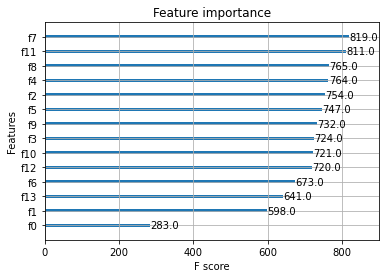

train acuuracy : 0.9925276620204052
train loss : 0.03505243634306296
--------test model done !---------
mode = 1 , feautres : sniffer location + time
-------------START !---------------


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 0 accuracy :  0.9655172413793104
Fold 1 accuracy :  0.9727011494252874
Fold 2 accuracy :  0.9798850574712644
Fold 3 accuracy :  0.9669540229885057
Fold 4 accuracy :  0.9755747126436781
Fold 5 accuracy :  0.9698275862068966
Fold 6 accuracy :  0.9640804597701149
Fold 7 accuracy :  0.9640804597701149
Fold 8 accuracy :  0.978448275862069
Fold 9 accuracy :  0.9654676258992806
average validation accuracy : 0.9702536591416523
----------------------------------------------------
Fold 0 loss :  0.11892159572034527
Fold 1 loss :  0.08582723471588287
Fold 2 loss :  0.06781999122941988
Fold 3 loss :  0.1081541428479146
Fold 4 loss :  0.07290235745384807
Fold 5 loss :  0.08638818334659504
Fold 6 loss :  0.1043740163835101
Fold 7 loss :  0.12594452892647248
Fold 8 loss :  0.06878571254854501
Fold 9 loss :  0.09894996970350878
average validation loss : 0.0938067732876042
-------model fit done !--------


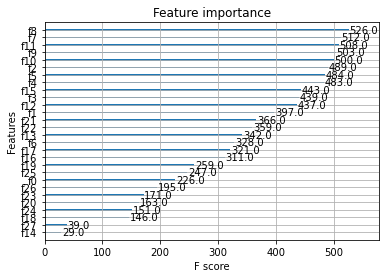

train acuuracy : 0.9978445178905015
train loss : 0.017421271025945533
--------test model done !---------
mode = 2 , feautres : sniffer location + color
-------------START !---------------


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 0 accuracy :  0.9798850574712644
Fold 1 accuracy :  0.9798850574712644
Fold 2 accuracy :  0.9841954022988506
Fold 3 accuracy :  0.978448275862069
Fold 4 accuracy :  0.9899425287356322
Fold 5 accuracy :  0.9827586206896551
Fold 6 accuracy :  0.978448275862069
Fold 7 accuracy :  0.9755747126436781
Fold 8 accuracy :  0.9870689655172413
Fold 9 accuracy :  0.9827338129496402
average validation accuracy : 0.9818940709501364
----------------------------------------------------
Fold 0 loss :  0.06474505914490739
Fold 1 loss :  0.05137744000350281
Fold 2 loss :  0.044064167829110726
Fold 3 loss :  0.07043327967502083
Fold 4 loss :  0.04303408700009895
Fold 5 loss :  0.056441342039727144
Fold 6 loss :  0.06289512046346679
Fold 7 loss :  0.09469275655375878
Fold 8 loss :  0.04319858275224471
Fold 9 loss :  0.06568939622807941
average validation loss : 0.059657123168991764
-------model fit done !--------


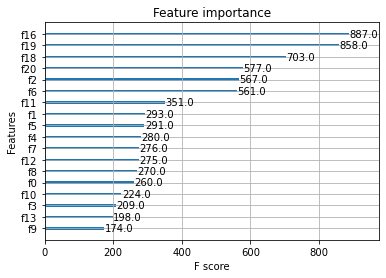

train acuuracy : 0.9938209512861044
train loss : 0.028261626146813802
--------test model done !---------
mode = 3 , feautres : sniffer location + class
-------------START !---------------


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 0 accuracy :  0.9727011494252874
Fold 1 accuracy :  0.9755747126436781
Fold 2 accuracy :  0.9841954022988506
Fold 3 accuracy :  0.9698275862068966
Fold 4 accuracy :  0.9683908045977011
Fold 5 accuracy :  0.9755747126436781
Fold 6 accuracy :  0.9755747126436781
Fold 7 accuracy :  0.9727011494252874
Fold 8 accuracy :  0.9827586206896551
Fold 9 accuracy :  0.9755395683453237
average validation accuracy : 0.9752838418920037
----------------------------------------------------
Fold 0 loss :  0.07638468032213666
Fold 1 loss :  0.07253565325588814
Fold 2 loss :  0.0441364710928972
Fold 3 loss :  0.07510820380319558
Fold 4 loss :  0.0676792993320783
Fold 5 loss :  0.07963605131053371
Fold 6 loss :  0.07503365551244315
Fold 7 loss :  0.09549129575472158
Fold 8 loss :  0.05099173204798168
Fold 9 loss :  0.08054997904815125
average validation loss : 0.07175470214800272
-------model fit done !--------


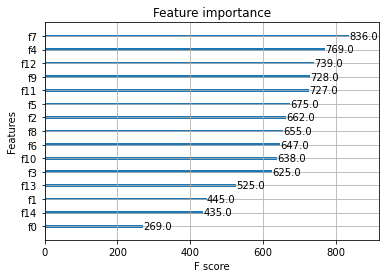

train acuuracy : 0.9926713608277051
train loss : 0.033707451610112835
--------test model done !---------
mode = 4 , feautres : sniffer location + time + color
-------------START !---------------


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 0 accuracy :  0.9770114942528736
Fold 1 accuracy :  0.9798850574712644
Fold 2 accuracy :  0.9827586206896551
Fold 3 accuracy :  0.9712643678160919
Fold 4 accuracy :  0.9870689655172413
Fold 5 accuracy :  0.9770114942528736
Fold 6 accuracy :  0.9813218390804598
Fold 7 accuracy :  0.9727011494252874
Fold 8 accuracy :  0.9885057471264368
Fold 9 accuracy :  0.9827338129496402
average validation accuracy : 0.9800262548581824
----------------------------------------------------
Fold 0 loss :  0.09635471328665147
Fold 1 loss :  0.06045174020887037
Fold 2 loss :  0.05435800268008116
Fold 3 loss :  0.09321549816767924
Fold 4 loss :  0.04429068899262951
Fold 5 loss :  0.06205883880764173
Fold 6 loss :  0.08040259166055892
Fold 7 loss :  0.11242407643420345
Fold 8 loss :  0.05246701511516936
Fold 9 loss :  0.0679523939463457
average validation loss : 0.07239755592998309
-------model fit done !--------


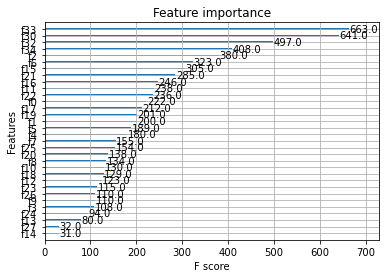

train acuuracy : 0.9981319155051013
train loss : 0.013275717576394497
--------test model done !---------
mode = 5 , feautres : sniffer location + time + class
-------------START !---------------


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 0 accuracy :  0.9640804597701149
Fold 1 accuracy :  0.9712643678160919
Fold 2 accuracy :  0.9798850574712644
Fold 3 accuracy :  0.9612068965517241
Fold 4 accuracy :  0.9669540229885057
Fold 5 accuracy :  0.9741379310344828
Fold 6 accuracy :  0.9626436781609196
Fold 7 accuracy :  0.9655172413793104
Fold 8 accuracy :  0.9827586206896551
Fold 9 accuracy :  0.9654676258992806
average validation accuracy : 0.9693915901761351
----------------------------------------------------
Fold 0 loss :  0.12213492615451906
Fold 1 loss :  0.08418896427252368
Fold 2 loss :  0.06240008186437376
Fold 3 loss :  0.10499540319498453
Fold 4 loss :  0.0701807897576967
Fold 5 loss :  0.08951062222872513
Fold 6 loss :  0.10303763227830443
Fold 7 loss :  0.1294308261171635
Fold 8 loss :  0.0627894683348605
Fold 9 loss :  0.09451424394702018
average validation loss : 0.09231829581501716
-------model fit done !--------


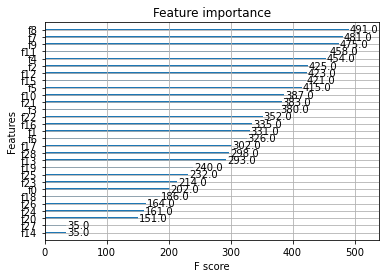

train acuuracy : 0.9977008190832016
train loss : 0.014578213643130212
--------test model done !---------
mode = 6 , feautres : sniffer location + color + class
-------------START !---------------


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 0 accuracy :  0.9770114942528736
Fold 1 accuracy :  0.9813218390804598
Fold 2 accuracy :  0.9841954022988506
Fold 3 accuracy :  0.978448275862069
Fold 4 accuracy :  0.9885057471264368
Fold 5 accuracy :  0.978448275862069
Fold 6 accuracy :  0.978448275862069
Fold 7 accuracy :  0.9755747126436781
Fold 8 accuracy :  0.9870689655172413
Fold 9 accuracy :  0.9827338129496402
average validation accuracy : 0.9811756801455387
----------------------------------------------------
Fold 0 loss :  0.0642364547830109
Fold 1 loss :  0.051162050253449394
Fold 2 loss :  0.04469466526360932
Fold 3 loss :  0.07193756281311532
Fold 4 loss :  0.04048958592297827
Fold 5 loss :  0.06281877924765324
Fold 6 loss :  0.06318515536158076
Fold 7 loss :  0.09307761302338982
Fold 8 loss :  0.043299026083678915
Fold 9 loss :  0.06651786862675256
average validation loss : 0.060141876137921844
-------model fit done !--------


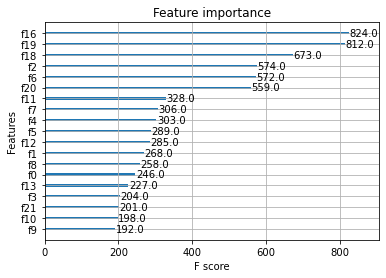

train acuuracy : 0.9933898548642046
train loss : 0.028225441612329673
--------test model done !---------
mode = 7 , feautres : sniffer location + time + color + class
-------------START !---------------


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 0 accuracy :  0.9741379310344828
Fold 1 accuracy :  0.978448275862069
Fold 2 accuracy :  0.9827586206896551
Fold 3 accuracy :  0.9755747126436781
Fold 4 accuracy :  0.9885057471264368
Fold 5 accuracy :  0.9755747126436781
Fold 6 accuracy :  0.978448275862069
Fold 7 accuracy :  0.9741379310344828
Fold 8 accuracy :  0.9870689655172413
Fold 9 accuracy :  0.981294964028777
average validation accuracy : 0.979595013644257
----------------------------------------------------
Fold 0 loss :  0.09621267283240079
Fold 1 loss :  0.062453649831177696
Fold 2 loss :  0.05657304300926695
Fold 3 loss :  0.08904529196367077
Fold 4 loss :  0.047791533170503935
Fold 5 loss :  0.06716578922536914
Fold 6 loss :  0.08324740317496435
Fold 7 loss :  0.11156590371865491
Fold 8 loss :  0.054096557405285094
Fold 9 loss :  0.06839732568554881
average validation loss : 0.07365491700168425
-------model fit done !--------


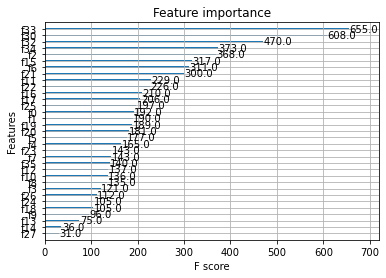

train acuuracy : 0.9978445178905015
train loss : 0.013510913035903849
--------test model done !---------


In [35]:
# fit model for different feautres
train_acc_arr = np.zeros(8)
train_loss_arr = np.zeros(8)
avg_valid_acc = np.zeros(8)
avg_valid_loss = np.zeros(8)
df_mac_test = df_mac_test.drop_duplicates(subset='mac_hash', keep='first', inplace=False, ignore_index=True)

for mode in range(8):
    verbose_str(mode)
    train_array, test_array, label_array = generate_data(mode, df_mac_train, df_train_label, df_cnt_train, df_time_train, df_color_train, df_class_train,
                                                        df_mac_test, df_cnt_test, df_time_test, df_color_test, df_class_test)
    test_predict, train_acc_arr[mode], train_loss_arr[mode], avg_valid_acc[mode], avg_valid_loss[mode] = model_fit(train_array, test_array, label_array)
    result = transfer_test(test_predict, df_mac_test, submit_index)
    result.to_csv("xgboost_test%s.csv"%mode, index=False)


In [38]:
matrix = np.zeros((4,8))
matrix[0,:] = train_acc_arr
matrix[1,:] = train_loss_arr
matrix[2,:] = avg_valid_acc
matrix[3,:] = avg_valid_loss

df = pd.DataFrame(matrix)
#df.rows = list(['train_acc', 'train_loss', 'valid_acc', 'valid_loss'])
df

,0,1,2,3,4,5,6,7
0,0.992528,0.997845,0.993821,0.992671,0.998132,0.997701,0.993390,0.997845
1,0.035052,0.017421,0.028262,0.033707,0.013276,0.014578,0.028225,0.013511
2,0.977727,0.970254,0.981894,0.975284,0.980026,0.969392,0.981176,0.979595
3,0.071263,0.093807,0.059657,0.071755,0.072398,0.092318,0.060142,0.073655


In [39]:
df.to_csv('statistic.csv')